# 🛒 TP – Data Crafting & Exploration (E-commerce)

Ce projet vous guide pas à pas dans la **préparation, la validation et l’exploration d’un jeu de données e-commerce** simulé.  
Vous y appliquerez les principes étudiés pendant le module **Data Crafting**, et amorcerez la transition vers le module **Data Mining**.

---

## 📊 Structure des données

Le jeu de données fourni (`ecommerce_dataset.csv`) contient plus de 500 lignes, chacune représentant une transaction e-commerce.  
Chaque ligne contient les colonnes suivantes :

| Colonne        | Description                                                                 |
|----------------|------------------------------------------------------------------------------|
| `UserID`       | Identifiant unique du client (ex : `CUST0012`)                              |
| `Age`          | Âge du client en années (valeurs aberrantes possibles)                      |
| `Email`        | Adresse e-mail (parfois mal formée)                                          |
| `Pays`         | Pays de résidence (certains champs vides ou incohérents)                    |
| `Produit`      | Code produit acheté (ex : `PRD034`)                                          |
| `Catégorie`    | Catégorie du produit (Mode, Électronique, etc.)                             |
| `Prix`         | Montant payé pour le produit (certains prix négatifs)                       |
| `DateAchat`    | Date d'achat (certaines valeurs manquantes ou mal formatées)                |

---

## 🎯 Objectifs pédagogiques

À l’issue de ce TP, vous serez capables de :

- ✅ Charger et explorer un dataset réel bruité
- ✅ Identifier les problèmes classiques : valeurs manquantes, incohérences, types incorrects
- ✅ Appliquer des techniques de nettoyage et de validation avec `pandas` et des expressions régulières
- ✅ Construire un pipeline de traitement de données reproductible
- ✅ Effectuer une première segmentation client avec un algorithme de clustering (pré-ML)

---
  
**📂 Données fournies :** `ecommerce_dataset.csv`  
**🛠️ Outils :** Python, pandas, matplotlib, scikit-learn, LabelEncoder, KMeans

In [257]:
# TP Data Crafting – JOUR 1
# Thèmes : Qualité, Alignement, Types, Anomalies visibles, Erreurs grossières
# Durée cible : 3h30
# Dataset : ecommerce_dataset.csv

# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import re
from pathlib import Path

np.random.seed(42) # Pour la reproductibilité des résultats

In [258]:
# Affichage élargi
pd.set_option("display.max_columns", 50)  # affiche plus de colonnes
pd.set_option("display.width", 120)  # élargit l'affichage horizontal
pd.set_option("display.max_rows", None)  # limite l'affichage en hauteur 

In [259]:
# Chargement des données et affichage de la forme

# Lecture du fichier CSV
df = pd.read_csv("ecommerce_dataset.csv", sep=",")

# Affichage de la forme (nb de lignes, nb de colonnes)
print("Shape du dataset :", df.shape)

Shape du dataset : (510, 8)


In [260]:
# --- Aperçu rapide --- (5 premières lignes et le nom colonnes)
print("\n--- APERCU des données ---")
print(df.head())

print("\n--- Colonnes du dataset ---")
print(df.columns.tolist())


--- APERCU des données ---
     UserID  Age              Email      Pays Produit     Catégorie   Prix   DateAchat
0  CUST0000   38  user0@hotmail.com    Canada  PRD014  Alimentation  89.26  2023-09-22
1  CUST0001   -1    user1@gmail.com    Canada  PRD011          Mode  42.30         NaN
2  CUST0002   58    user2@gmail.com  Belgique  PRD029  Alimentation  56.57  2023-06-10
3  CUST0003   50  user3@hotmail.com       USA  PRD015  Alimentation  48.55         NaN
4  CUST0004   26     user4@yaho.com    Canada  PRD023  Électronique  68.04  2023-03-30

--- Colonnes du dataset ---
['UserID', 'Age', 'Email', 'Pays', 'Produit', 'Catégorie', 'Prix', 'DateAchat']


In [261]:
# Vérification du nombre de colonnes attendues
expected_n_cols = 8  # On s'attend à 8 colonnes normalement...
nb_cols = len(df.columns)

print(f"\n--- Vérification du nombre de colonnes ---")
print(f"Colonnes trouvées : {nb_cols} / Colonnes attendues : {expected_n_cols}")

if nb_cols != expected_n_cols:
    print(
        "⚠️  Attention : le CSV n'a pas le bon nombre de colonnes), vérifiez le séparateur utilisé !"
    )


--- Vérification du nombre de colonnes ---
Colonnes trouvées : 8 / Colonnes attendues : 8


In [262]:
# --- Types de données initiaux ---

print("\n--- Types de données initiaux ---")
print(df.dtypes)


--- Types de données initiaux ---
UserID        object
Age            int64
Email         object
Pays          object
Produit       object
Catégorie     object
Prix         float64
DateAchat     object
dtype: object


In [263]:
# --- Conversion de types :  DateAchat , Prix, Age ---
# DateAchat

# Conversion de DateAchat en datetime
df["DateAchat"] = pd.to_datetime(df["DateAchat"], errors="coerce")

# Conversion de Prix en numérique (float)
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")

# Conversion de Age en numérique (int ou float si valeurs manquantes)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

print("\n--- Types après conversion ---")
print(df.dtypes)


--- Types après conversion ---
UserID               object
Age                   int64
Email                object
Pays                 object
Produit              object
Catégorie            object
Prix                float64
DateAchat    datetime64[ns]
dtype: object


In [264]:
# Conversion forcée si erreur : Prix et Age

# Prix --> numérique, valeurs incorrectes deviennent NaN
df["Prix"] = pd.to_numeric(df["Prix"], errors="coerce")

# Age --> numérique, valeurs incorrectes deviennent NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

print("\n--- Vérification après conversion forcée ---")
print(df[["Prix", "Age"]].head())


--- Vérification après conversion forcée ---
    Prix  Age
0  89.26   38
1  42.30   -1
2  56.57   58
3  48.55   50
4  68.04   26


In [265]:
# --- Statistiques globales ---
print("\n--- Statistiques globales (colonnes numériques) ---")
print(df.describe())

print("\n--- Statistiques globales (colonnes catégorielles) ---")
print(df.describe(include="object"))


--- Statistiques globales (colonnes numériques) ---
              Age        Prix                      DateAchat
count  510.000000  510.000000                            475
mean    44.182353   48.947804  2023-05-27 11:37:15.789473792
min     -1.000000  -10.000000            2023-01-01 00:00:00
25%     28.000000   35.220000            2023-03-13 00:00:00
50%     43.000000   50.200000            2023-05-27 00:00:00
75%     56.750000   64.660000            2023-08-03 12:00:00
max    200.000000  112.100000            2023-10-27 00:00:00
std     27.182135   23.496892                            NaN

--- Statistiques globales (colonnes catégorielles) ---
          UserID    Email    Pays Produit     Catégorie
count        510      510     469     510           510
unique       500      500       4      30             5
top     CUST0067  user67@  France  PRD026  Électronique
freq           2        2     167      25           110


In [266]:
# ----------------------------
# 🔍 ANALYSE QUALITATIVE
# ----------------------------

# 1. Duplicats
print("\n--- Recherche de doublons ---")
nb_duplicats = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {nb_duplicats}")

# Si des doublons existent, on peut les supprimer
if nb_duplicats > 0:
    df = df.drop_duplicates()
    print(f"✅ Doublons supprimés. Nouveau shape : {df.shape}")


--- Recherche de doublons ---
Nombre de lignes dupliquées : 10
✅ Doublons supprimés. Nouveau shape : (500, 8)


In [267]:
# 2. Alignement (valeurs dans les mauvaises colonnes : le cas de la colonne Email)
# Fonction simple : détecte si une chaîne ressemble à un email
def look_like_email(x):
    return isinstance(x, str) and "@" in x and "." in x


# Si Email n'est pas un email mais qu'une autre colonne en contient, on la remet dans Email
colonnes_candidates = [c for c in df.columns if c != "Email"]

for col in colonnes_candidates:
    mask_email_misplaced = (~df["Email"].astype(str).apply(look_like_email)) & (
        df[col].astype(str).apply(look_like_email)
    )

    if mask_email_misplaced.any():
        print(
            f"✅ Réalignement détecté depuis la colonne {col} → Email ({mask_email_misplaced.sum()} valeurs déplacées)"
        )

        # On copie l'info dans Email
        df.loc[mask_email_misplaced, "Email"] = df.loc[mask_email_misplaced, col]

        # On vide la colonne d'origine
        df.loc[mask_email_misplaced, col] = np.nan

# Détection d'emails invalides avec regex : doivent contenir au moins un @ et un point après
regex_email = re.compile(r"^[^@\s]+@[^@\s]+\.[^@\s]+$")


def email_valide(x):
    return bool(regex_email.match(str(x))) if isinstance(x, str) else False


invalid_mask = ~df["Email"].astype(str).apply(email_valide)

print(f"\n📌 Emails invalides détectés : {invalid_mask.sum()}")
if invalid_mask.sum() > 0:
    print(df.loc[invalid_mask, ["UserID", "Email"]].head(10))


📌 Emails invalides détectés : 127
      UserID    Email
8   CUST0008   user8@
10  CUST0010  user10@
21  CUST0021  user21@
22  CUST0022  user22@
30  CUST0030  user30@
36  CUST0036  user36@
37  CUST0037  user37@
38  CUST0038  user38@
44  CUST0044  user44@
45  CUST0045  user45@


In [268]:
# Affichage des emails problématiques

# On réutilise le masque 'invalid_mask' défini juste avant
nb_pb = int(invalid_mask.sum())
print(f"\n--- Emails problématiques (invalides) : {nb_pb} ---")

if nb_pb > 0:
    # Aperçu rapide
    print(
        df.loc[invalid_mask, ["UserID", "Email"]].head(1000)
    )  # Je ne sais pas pourquoi pd.set_option("display.max_rows", None) n'a pas fonctionné ici... None devrait afficher toutes les lignes...
else:
    print("✅ Aucun email problématique détecté.")


--- Emails problématiques (invalides) : 127 ---
       UserID     Email
8    CUST0008    user8@
10   CUST0010   user10@
21   CUST0021   user21@
22   CUST0022   user22@
30   CUST0030   user30@
36   CUST0036   user36@
37   CUST0037   user37@
38   CUST0038   user38@
44   CUST0044   user44@
45   CUST0045   user45@
49   CUST0049   user49@
55   CUST0055   user55@
57   CUST0057   user57@
58   CUST0058   user58@
59   CUST0059   user59@
67   CUST0067   user67@
69   CUST0069   user69@
81   CUST0081   user81@
91   CUST0091   user91@
95   CUST0095   user95@
98   CUST0098   user98@
102  CUST0102  user102@
104  CUST0104  user104@
105  CUST0105  user105@
124  CUST0124  user124@
127  CUST0127  user127@
129  CUST0129  user129@
130  CUST0130  user130@
134  CUST0134  user134@
136  CUST0136  user136@
137  CUST0137  user137@
138  CUST0138  user138@
142  CUST0142  user142@
148  CUST0148  user148@
150  CUST0150  user150@
153  CUST0153  user153@
156  CUST0156  user156@
163  CUST0163  user163@
164  CUST0164  

In [269]:
# 3. Visualisation 1 : valeurs uniques
print("\n--- Nombre de valeurs uniques par colonne ---")
valeurs_uniques = df.nunique(dropna=True) # dropna=True pour ne pas compter les NaN
print(valeurs_uniques)


--- Nombre de valeurs uniques par colonne ---
UserID       500
Age           54
Email        500
Pays           4
Produit       30
Catégorie      5
Prix         466
DateAchat    236
dtype: int64


📊 Graphique sauvegardé : fig_unique_value.png


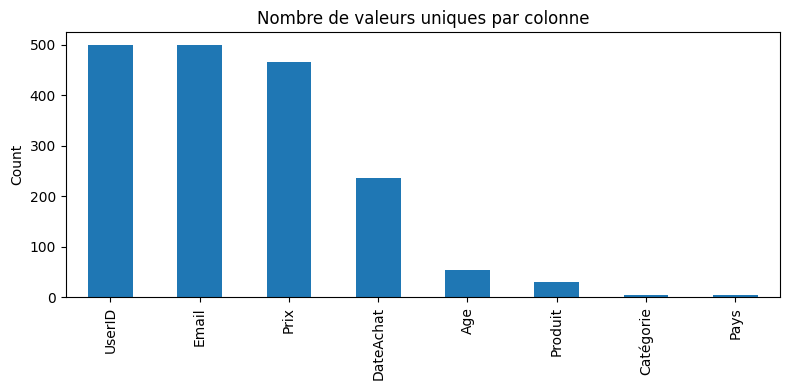

In [270]:
# 3. Visualisation 2 : valeurs uniques
try:
    plt.figure(figsize=(8, 4))
    valeurs_uniques.sort_values(ascending=False).plot(kind="bar")
    plt.title("Nombre de valeurs uniques par colonne")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("fig_unique_value.png")
    # plt.show() # output in screen if needed
    print("📊 Graphique sauvegardé : fig_unique_value.png")

except Exception as e:
    print(f"[INFO] Impossible de tracer le graphique des valeurs uniques : {e}")

In [271]:
# 4. Statistiques des âges
print("\n--- Statistiques des âges ---")
print(df["Age"].describe())


--- Statistiques des âges ---
count    500.000000
mean      44.110000
std       27.377234
min       -1.000000
25%       27.750000
50%       43.000000
75%       56.000000
max      200.000000
Name: Age, dtype: float64


📊 Graphique sauvegardé : fig_age_hist_before.png


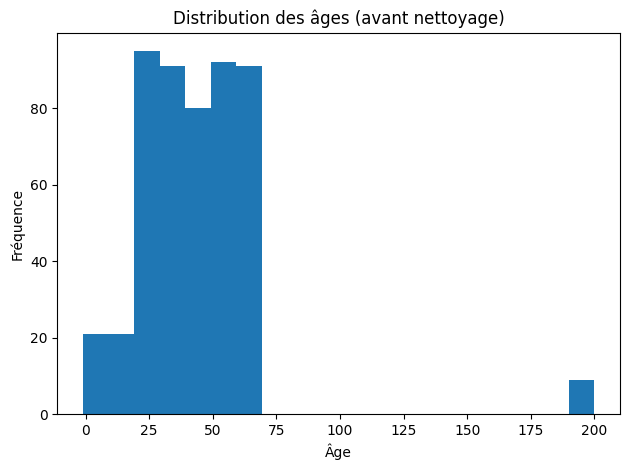

In [272]:
# Visualisation des âges
try:
    plt.figure()
    df["Age"].dropna().astype(float).plot(kind="hist", bins=20)
    plt.title("Distribution des âges (avant nettoyage)")
    plt.xlabel("Âge")
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.savefig("fig_age_hist_before.png")
    # plt.show()   # optionnel si environnement graphique
    print("📊 Graphique sauvegardé : fig_age_hist_before.png")
except Exception as e:
    print(f"[INFO] Impossible de tracer le graphique des âges : {e}")

In [273]:
# Suppression des âges aberrants (< 10 ou > 100)
avant = df.shape[0]

# On garde :
# - les âges NaN (dropNA serait trop agressif)
# - les âges entre 10 et 102 inclus
df = df[(df["Age"].isna()) | ((df["Age"] >= 10) & (df["Age"] <= 102))]

apres = df.shape[0]
print(f"✅ Suppression des âges aberrants : {avant - apres} lignes supprimées")

✅ Suppression des âges aberrants : 30 lignes supprimées


In [274]:
#  5. Prix aberrants
print("\n--- Prix aberrants ---")

# On considère aberrant : prix <= 0 ou prix manquant
masque_prix_aberrants = (df["Prix"] <= 0) | (df["Prix"].isna())

nb_aberrants = masque_prix_aberrants.sum()
print(f"Nombre de lignes avec prix aberrants : {nb_aberrants}")

# Affichage d’un aperçu
if nb_aberrants > 0:
    print(df.loc[masque_prix_aberrants, ["UserID", "Prix"]].head(10))


--- Prix aberrants ---
Nombre de lignes avec prix aberrants : 22
       UserID  Prix
36   CUST0036 -10.0
44   CUST0044 -10.0
52   CUST0052 -10.0
86   CUST0086  -2.2
104  CUST0104 -10.0
149  CUST0149 -10.0
171  CUST0171 -10.0
194  CUST0194 -10.0
207  CUST0207 -10.0
214  CUST0214 -10.0


In [275]:
# Suppression des lignes concernées (Prix aberrants)
avant = df.shape[0]

# On supprime les lignes dont le prix est <= 0 ou manquant
df = df[~masque_prix_aberrants]

apres = df.shape[0]
print(f"✅ Suppression des prix aberrants : {avant - apres} lignes supprimées")

✅ Suppression des prix aberrants : 22 lignes supprimées


📊 Graphique sauvegardé : fig_prix_hist.png


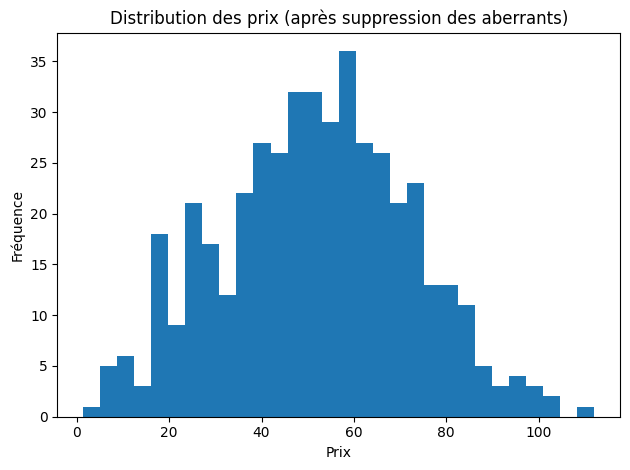

In [276]:
# TODO : 6. Visualisation des prix
try:
    plt.figure()
    df["Prix"].astype(float).plot(kind="hist", bins=30)
    plt.title("Distribution des prix (après suppression des aberrants)")
    plt.xlabel("Prix")
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.savefig("fig_prix_hist.png")
    # plt.show()   # À activer si tu veux l’afficher sur écran
    print("📊 Graphique sauvegardé : fig_prix_hist.png")
except Exception as e:
    print(f"[INFO] Impossible de tracer le graphique des prix : {e}")

In [277]:
# TODO : 7. Validation Email simple (regex)

# On réutilise la regex déjà définie plus haut : regex_email
df["EmailValide"] = ( # ajout du flag ici on supprimera les mail juste après
    df["Email"]
    .astype(str)
    .apply(
        lambda x: bool(regex_email.match(x.strip())) if isinstance(x, str) else False
    )
)

print("\n--- Validation Email ---")
print(df[["UserID", "Email", "EmailValide"]].head(1000))
print(f"✅ Emails valides : {df['EmailValide'].sum()} / {len(df)}, soit {df['EmailValide'].mean()*100:.2f}%")


--- Validation Email ---
       UserID                Email  EmailValide
0    CUST0000    user0@hotmail.com         True
2    CUST0002      user2@gmail.com         True
3    CUST0003    user3@hotmail.com         True
4    CUST0004       user4@yaho.com         True
5    CUST0005      user5@gmail.com         True
6    CUST0006    user6@hotmail.com         True
7    CUST0007      user7@gmail.com         True
8    CUST0008               user8@        False
9    CUST0009       user9@yaho.com         True
10   CUST0010              user10@        False
12   CUST0012   user12@hotmail.com         True
13   CUST0013      user13@yaho.com         True
14   CUST0014      user14@yaho.com         True
15   CUST0015   user15@hotmail.com         True
16   CUST0016      user16@yaho.com         True
17   CUST0017     user17@gmail.com         True
18   CUST0018   user18@hotmail.com         True
19   CUST0019   user19@hotmail.com         True
20   CUST0020   user20@hotmail.com         True
21   CUST0021 

In [278]:
# Suppression ou flag des emails invalides
avant = df.shape[0]
df = df[df["EmailValide"]]  # On garde uniquement les lignes valides grâce au flag créé juste avant
apres = df.shape[0]

print(f"\n✅ Suppression emails invalides : {avant - apres} lignes supprimées")


✅ Suppression emails invalides : 113 lignes supprimées


In [279]:
# ----------------------------
# 🧪 Alignement manuel (format CSV)
# ----------------------------
# TODO : Vérification manuelle du nombre de séparateurs (,) sur les 15 premières lignes
with open("ecommerce_dataset.csv", "r", encoding="utf-8", errors="replace") as f:
    print("\n--- Vérification du nombre de séparateurs sur les 15 premières lignes ---")
    for i in range(15):
        ligne = f.readline()
        if not ligne:
            break

        nb_sep = ligne.count(",")  # séparateur à vérifier
        print(f"Ligne {i+1:02d} -> {nb_sep} séparateurs | {ligne.strip()}")


--- Vérification du nombre de séparateurs sur les 15 premières lignes ---
Ligne 01 -> 7 séparateurs | UserID,Age,Email,Pays,Produit,Catégorie,Prix,DateAchat
Ligne 02 -> 7 séparateurs | CUST0000,38,user0@hotmail.com,Canada,PRD014,Alimentation,89.26,2023-09-22
Ligne 03 -> 7 séparateurs | CUST0001,-1,user1@gmail.com,Canada,PRD011,Mode,42.3,
Ligne 04 -> 7 séparateurs | CUST0002,58,user2@gmail.com,Belgique,PRD029,Alimentation,56.57,2023-06-10
Ligne 05 -> 7 séparateurs | CUST0003,50,user3@hotmail.com,USA,PRD015,Alimentation,48.55,
Ligne 06 -> 7 séparateurs | CUST0004,26,user4@yaho.com,Canada,PRD023,Électronique,68.04,2023-03-30
Ligne 07 -> 7 séparateurs | CUST0005,26,user5@gmail.com,France,PRD018,Sport,75.49,2023-05-22
Ligne 08 -> 7 séparateurs | CUST0006,21,user6@hotmail.com,USA,PRD007,Mode,55.16,2023-07-22
Ligne 09 -> 7 séparateurs | CUST0007,65,user7@gmail.com,USA,PRD020,Électronique,59.38,
Ligne 10 -> 7 séparateurs | CUST0008,50,user8@,USA,PRD016,Sport,37.59,2023-08-15
Ligne 11 -> 7 sép


--- Répartition des pays (top 5) ---
Pays
France      105
Canada       74
Usa          73
Belgique     61
Nan          22
Name: count, dtype: int64
📊 Graphique sauvegardé : fig_country_top5.png


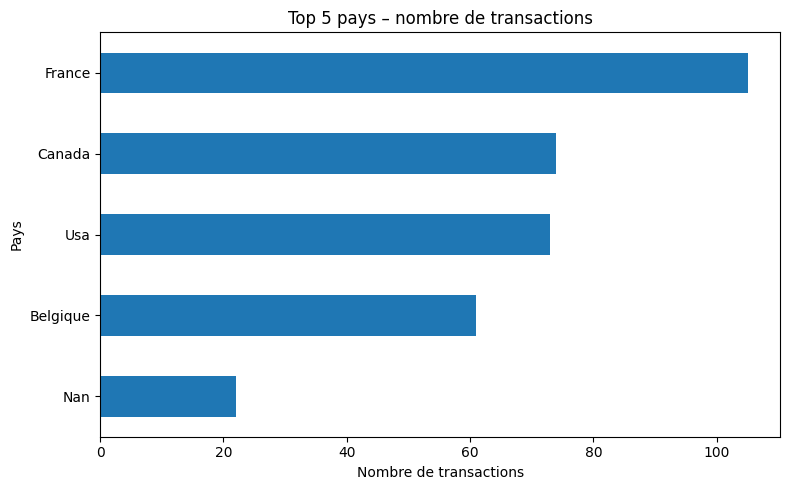

In [280]:
# ----------------------------
# 📊 Visualisations globales
# ----------------------------

# Répartition des pays
print("\n--- Répartition des pays (top 5) ---")
pays_counts = (
    df["Pays"]
    .astype(str)
    .str.strip()
    .str.title()  # harmonise les capitalisations
    .replace({"": np.nan})
    .dropna()
    .value_counts()
)

print(pays_counts.head(5))

# Visualisation
try:
    plt.figure(figsize=(8, 5))
    pays_counts.head(15).sort_values(ascending=True).plot(kind="barh")
    plt.title("Top 5 pays – nombre de transactions")
    plt.xlabel("Nombre de transactions")
    plt.ylabel("Pays")
    plt.tight_layout()
    plt.savefig("fig_country_top5.png")
    # plt.show()  # optionnel
    print("📊 Graphique sauvegardé : fig_country_top5.png")
except Exception as e:
    print(f"[INFO] Impossible de tracer le graphique des pays : {e}")

In [281]:
# ----------------------------
# 💾 Sauvegarde
# ----------------------------

# sauvegarde dans un csv du fichier nettoyé

df.to_csv("ecommerce_dataset_clean.csv", index=False)
print("✅ Fichier nettoyé sauvegardé : ecommerce_dataset_clean.csv")

✅ Fichier nettoyé sauvegardé : ecommerce_dataset_clean.csv
